  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Solution to Random Forest Classification Problem
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The objective of the dataset is to predict the quality of wine, whether it is a good quality of wine or ordinary quality 

The data set contains several parameters which are considered important while determining the quality of a wine

The dataset consists of several predictor variables and one target variable, Quality. The target variable has values ranging from 0 to 10, the value is the rating given to each wine on a 10 point scale

## Data Definition:
 
The real-valued features are as follows:

1) **Fixed acidity:** acidity in the wine <br>
2) **Volatile acidity:** steam distillable acid in wine<br>
3) **Citric acid:** amount of citric acid present in wine<br>
4) **Residual sugar:** sugar from grapes that's left over fermentation<br>
5) **Chlorides:** amount of chloride in wine which gives a salty flavor<br>
6) **Free sulfur dioxide:** amount of sulphur dioxide which is not bound to other molecules<br>
7) **Total sulfur dioxide:** free sulphur dioxide plus amount of sulphur dioxide which is bounded to other molecules
8) **Density:** molecular density of wine<br>
9) **Ph:** pH value of wines<br>
10) **Sulphates:** amount of sulphur added to prevent oxidation of wine and bacterial spoilage<br>
11) **Alcohol:** amount of alcohol <br>

Output variable (desired target):

11) **Quality** - values ranging from 0 to 10, which gives the rating of each wine

## Content

1. **[Import Libraries](#import_lib)**
2. **[Exploratory Data Analysis](#exploratory)**
3. **[Building a RF model](#model)**

<a id='import_lib'></a>
## 1. Import Libraries

In [31]:
# Numpy library is used to work with arrays and also has functions for working in domain of linear algebra
import numpy as np

# Pandas library provides easy to use data structures and data analysis tools
import pandas as pd

# Matplotlib library is used for plotting graphs 
import matplotlib.pyplot as plt

# Seaborn library is used for generating visualizations and is based on matplotlib
import seaborn as sns

# Sklearn pre-processing package provides several common utility functions and transformer classes for standardization of data
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Importing the library to split the data into train and test set
from sklearn.model_selection import train_test_split

# Importing the evaluation metric accuracy score of the model
from sklearn.metrics import accuracy_score

# Importing the evaluation metric confusion matrix 
from sklearn.metrics import confusion_matrix

# Importing the random forets classifier
from sklearn.ensemble import RandomForestClassifier

# Import roc_curve to compute Receiver Operating Characteristics 
from sklearn.metrics import roc_curve

# Import roc_auc_score to calculate the area uner the curve
from sklearn.metrics import roc_auc_score

# pyplot is a state-based interface to matplotlib which provides a MATLAB-like way of plotting.
from matplotlib import pyplot

In [2]:
# Let us read the data
wine = pd.read_csv('wine.csv')

<a id='exploratory'></a>
## 2. Exploratory Data Analysis (EDA)

In [7]:
# Ques 1 a) Visualizing the first 10 rows from the data set
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
# Let us take a look at the data types of the variables
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# Ques 1 b) Check the shape of the data set
wine.shape

(1599, 12)

We can see here that the data set contains 1599 observations and 12 attributes

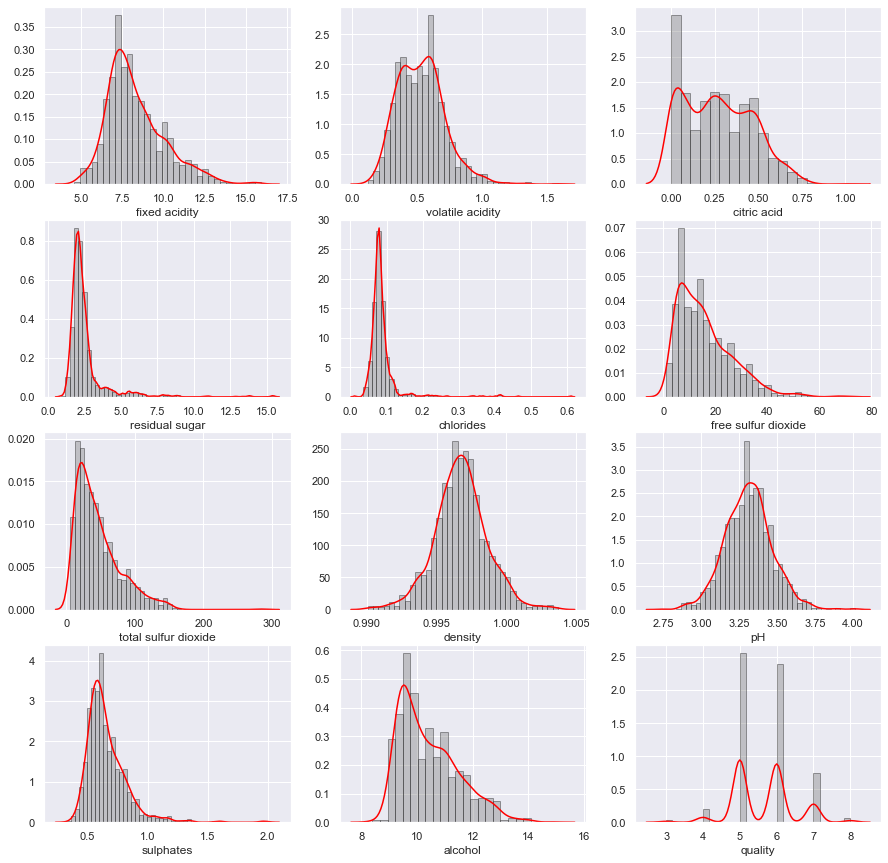

In [11]:
# Ques 1 c) Show distribution of the numerical columns
sns.set()
fig = plt.figure(figsize = [15, 15])

# Specifying the columns
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
count = 1

# Generating the plots
for col in cols :
    plt.subplot(4,3,count)
    sns.distplot(wine[col],hist_kws = dict(edgecolor = "k", linewidth = 1,color = 'grey'), color = 'red')
    count+=1
plt.show() 

Here we can see the distribution of all the attributes, including the target variable

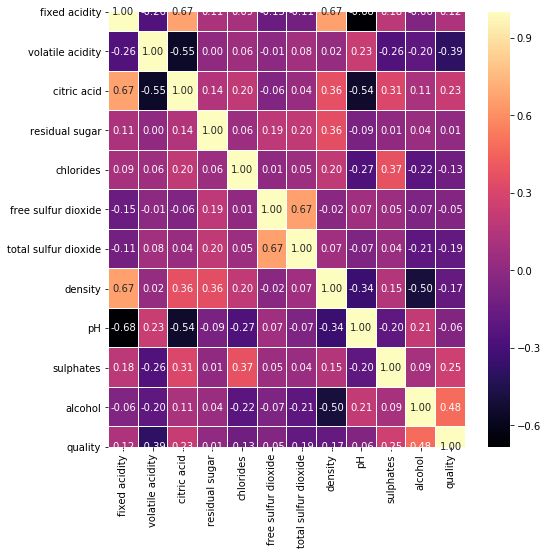

In [10]:
# Ques 1 d) Generate the correlation matrix
plt.figure(figsize = (8, 8))
sns.heatmap(wine.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

A high positive correlation of 0.67 is observed between :

fixed acidity & citric acid<br>
fixed acidity & density<br>
free sulfur dioxide & total sulfur dioxide<br>
fixed acidity & pH are negatively correlated with a high absolute magnitude of 0.68 .

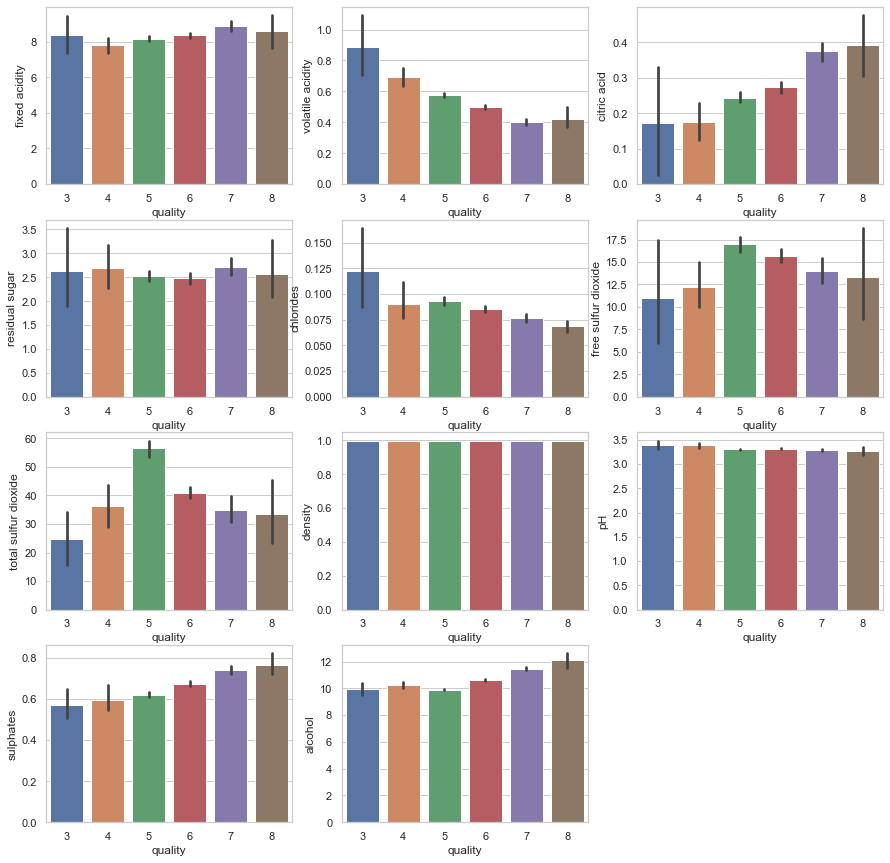

In [12]:
# Ques 1 e) Visualize whether any attributes are related to the target variable
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15, 15])

# Plotting the independent variables with the target variable
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
count = 1

# Generating the plots
for col in cols :
    plt.subplot(4,3,count)
    sns.barplot(data = wine, x = 'quality', y = col)
    count+=1
plt.show()  

Here, we can see that:
There is an increase in the following attributes as the wine quality increases :

1) citric acid <br>
2) sulphates<br>
3) alcohol<br>

A decrease is observed in the following as the wine quality increases :

1) volatile acidity<br>
2) chlorides<br>
3) pH<br>

C:\Users\nilim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nilim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


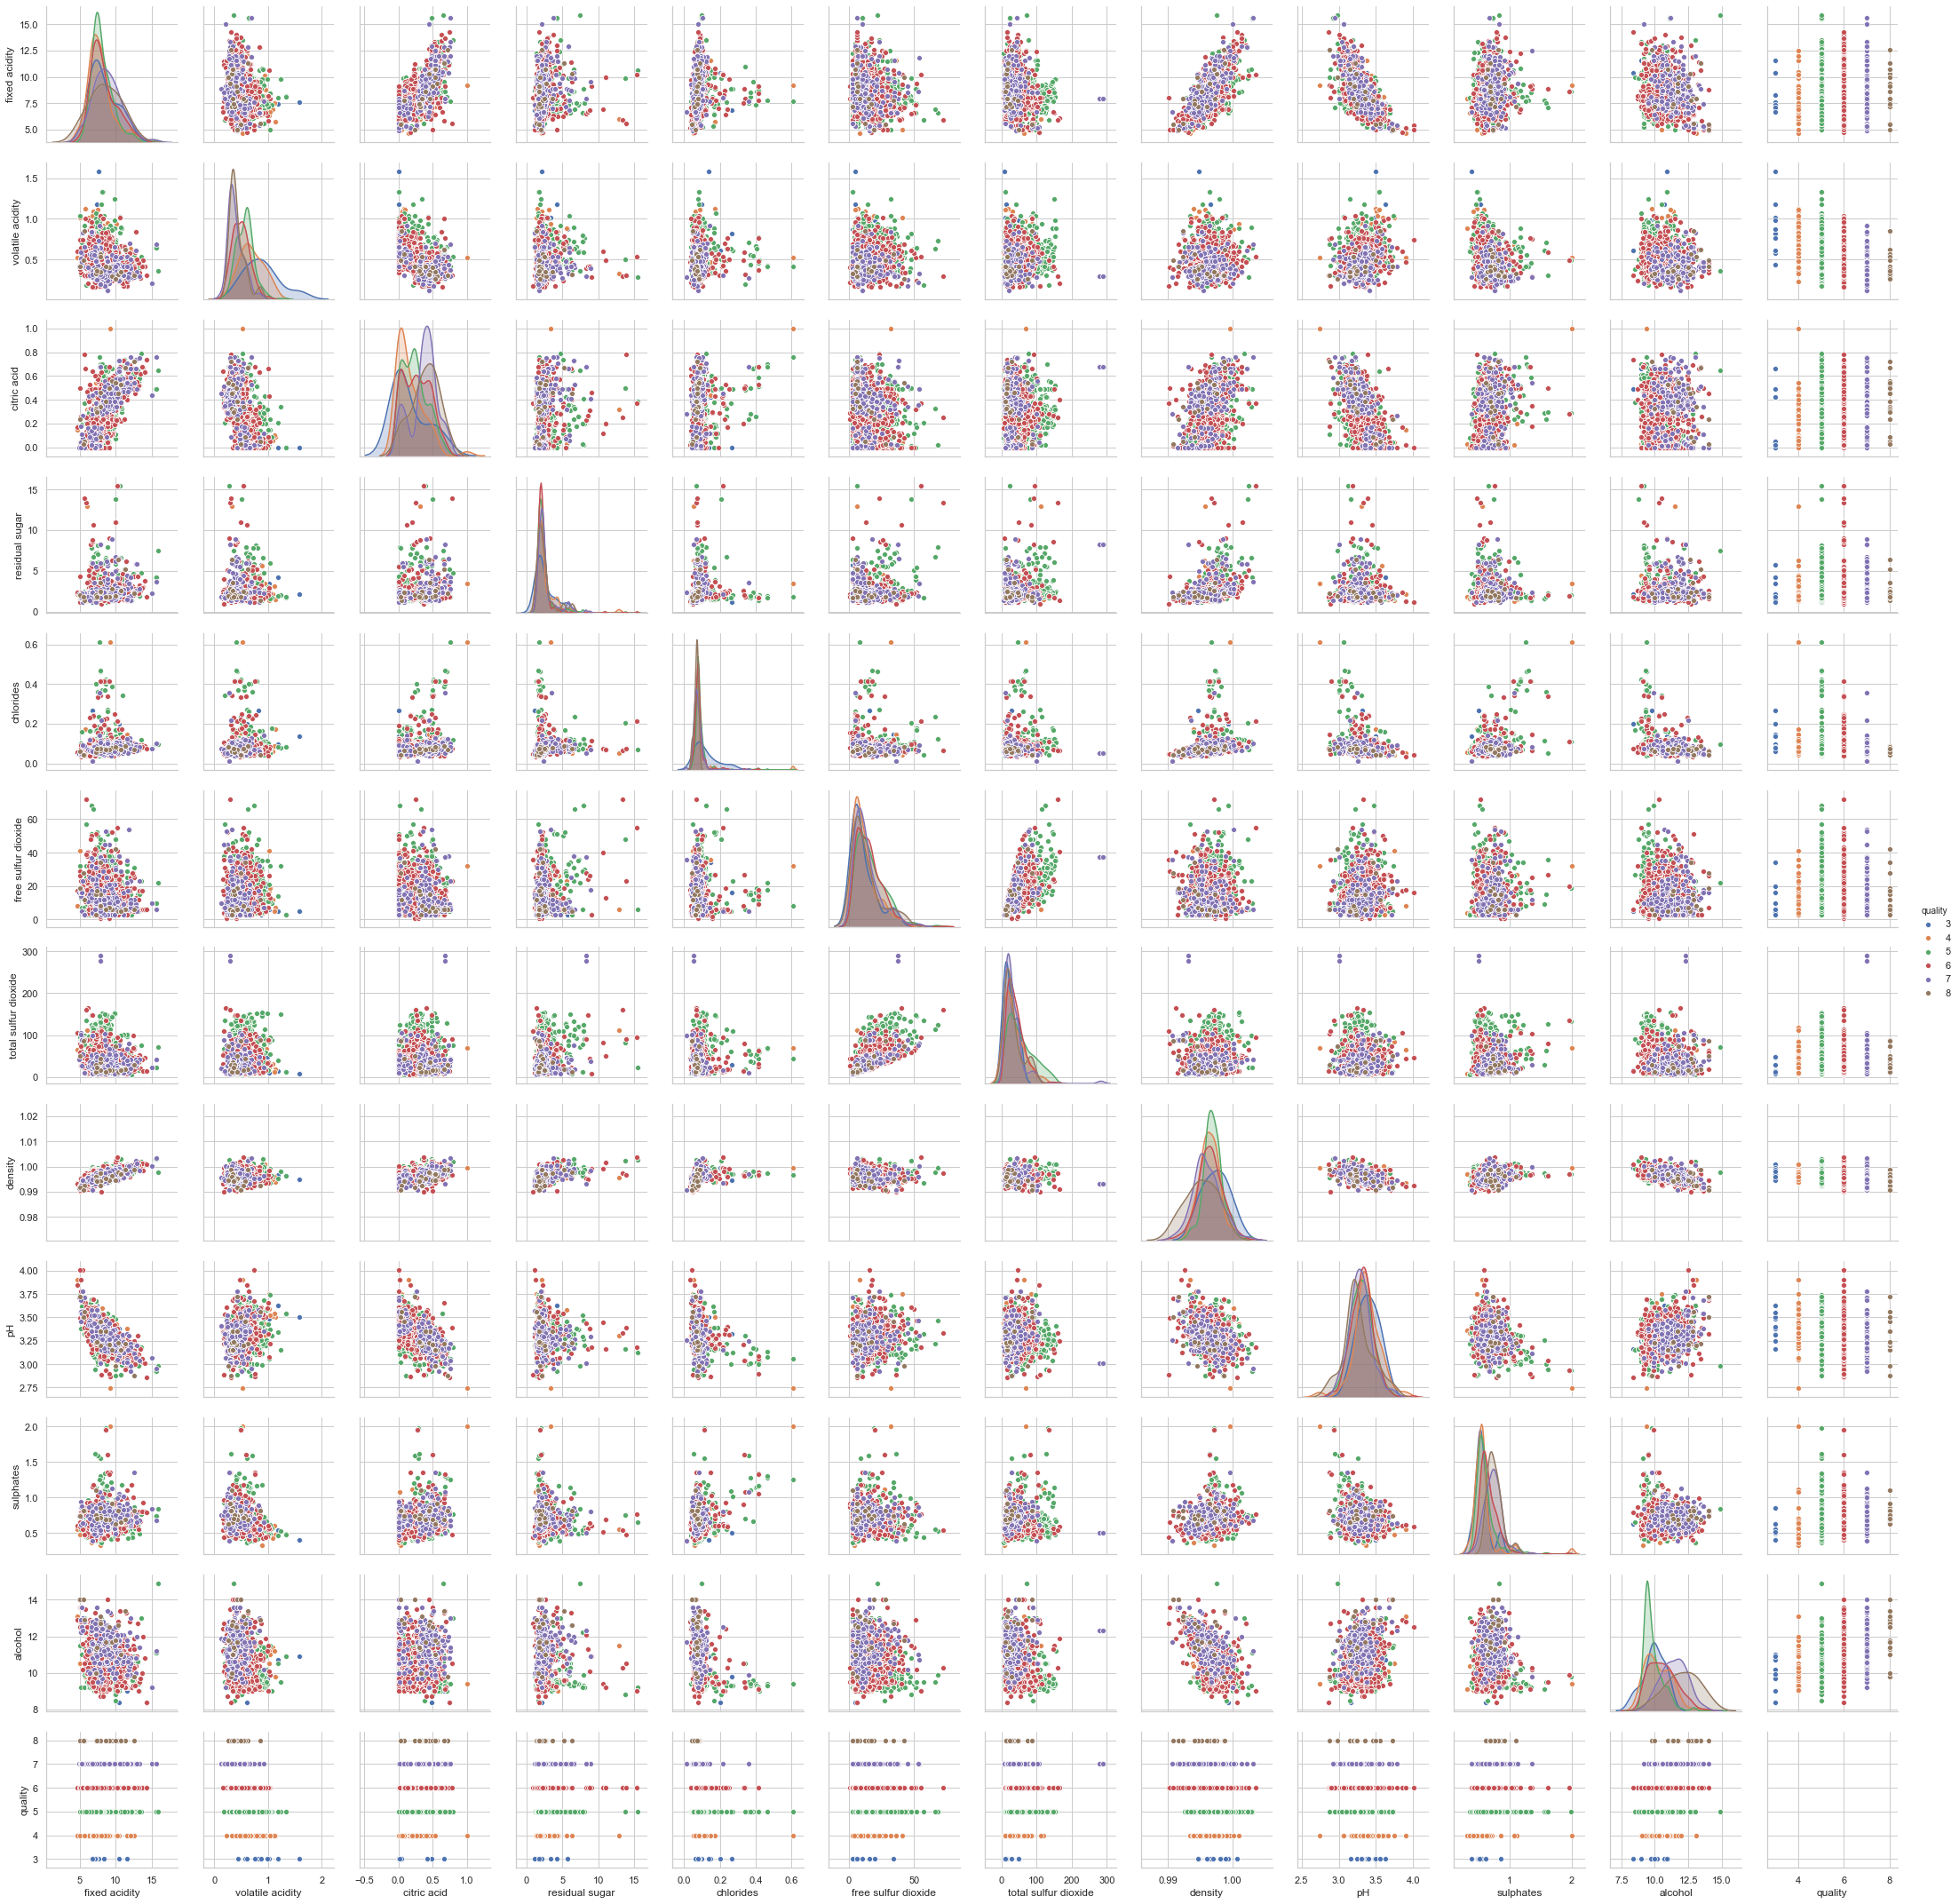

In [13]:
# Ques 2) Generate pair-plot for the data
sns.pairplot(wine, hue = 'quality')
plt.show()

Here we can see the histogram for each variable as well as the scatter plots based on the quality of wines

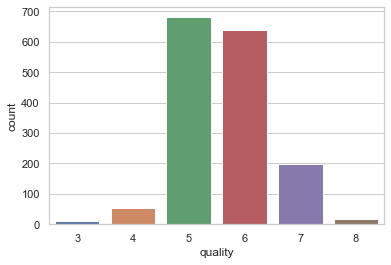

In [14]:
# Ques 3) Generate a count plot for the target variable (quality)
sns.countplot(data = wine, x = 'quality')
plt.show()

Here we can see that most of the wines have the quality rating of 5 or 6

In [16]:
# Ques 4) Converting the target variable 'Quality' to categorical
# Such that 
# Wines having the “Quality” value > 6.5  are assigned value 1, and 
# Wines having the “Quality” value < 6.5, are assigned value 0
# Where 0: Ordinary Quality of wine and 1: High quality of wine

wine['quality'] = wine.quality.apply(lambda x : 1 if x > 6.5 else 0)

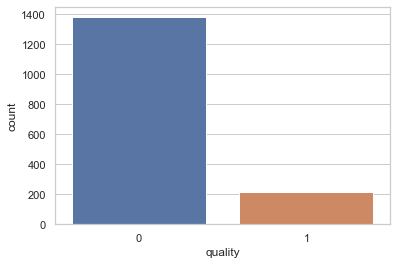

In [17]:
# Let us again visualize the count plot for the target variable
sns.countplot(data = wine, x = 'quality')
plt.show()

We can see that very few wines in the data set are of high quality while most of them are of ordinary quality

<a id='model'></a>
## 3. Building a RF model

In [21]:
# Splitting the data set into train and test sets
x = wine.drop('quality',1)
y = wine['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 100)

C:\Users\nilim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Parameters in the classifier
1) **n_estimators:** number of trees in the forest<br>
2) **criterion:** the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain<br>
3) **min_samples_split:** the minimum number of samples required to split an internal node, default = 2<br>
4) **min_samples_leaf:** the minimum number of samples required to be at a leaf node<br>
5) **max_features:** the number of features to consider when looking for the best split, default = "auto" <br>
6) **random_state:** controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node<br>
7) **max_depth:** the maximum depth of the tree

In [102]:
# Ques 5) Build a random forest classifier
# Creating a random forest classifier
clf_rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', 
                                min_samples_split = 10, min_samples_leaf = 9, max_features = "auto",
                                random_state = 500, max_depth = 12) 

In [104]:
# Training the model 
clf_fit = clf_rf.fit(x_train, y_train) 

# Predicting the quality
y_pred = clf_fit.predict(x_test) 

In [105]:
# Checking the accuracy of the model
accuracy_score(y_test, y_pred)

0.903125

In [106]:
# Predicting the probabilities of wine being of high quality
y_proba = clf_fit.predict_proba(x_test)

In [107]:
# Visualizing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[276   9]
 [ 22  13]]


We can see that our model is able to classify the wine quality with an accuracy of 90% and in the confusion matrix we can see that there are very few values which are being wrongly classified. Let us now take a look at the AUC for the model

In [108]:
# Visualizing the ROC-AUC curve 

# We take the predicted values of class 1
y_predicted = y_proba[:,1]

# We check to see if the right values have been considered from the predicted values
print(y_predicted)

[1.00293128e-01 6.02792697e-01 3.27142700e-02 1.62877774e-02
 2.33994620e-01 7.72579509e-01 8.33333333e-04 2.84761831e-01
 2.38610011e-01 3.27817941e-01 7.70938719e-01 6.57616323e-03
 4.39441908e-02 2.79068518e-03 4.41236315e-02 0.00000000e+00
 2.56746681e-01 9.89898660e-03 3.76027105e-02 1.93242388e-02
 2.15928131e-01 2.45000000e-03 4.71832324e-02 5.67261995e-01
 5.83510659e-01 4.60379222e-01 1.10668623e-01 2.30486055e-02
 1.11365583e-01 2.89722073e-02 1.55829042e-02 2.08084313e-02
 3.64107647e-01 2.41620724e-01 5.41239827e-03 1.31465090e-01
 1.05751869e-01 2.57106545e-02 4.20769184e-02 3.12454212e-03
 6.34585991e-03 4.84719691e-01 1.77161461e-01 1.00724870e-01
 1.42266461e-01 9.62343609e-02 2.40837832e-02 2.51401220e-01
 9.51849458e-03 1.57823337e-01 1.39467402e-02 8.38132356e-03
 3.05272531e-02 1.53927989e-01 2.06792669e-01 4.34617471e-01
 4.89730357e-01 1.24738471e-01 1.48803771e-02 3.20337153e-02
 5.90751452e-01 2.13456884e-02 3.11327177e-01 8.69600737e-01
 7.26032498e-03 1.029508

In [109]:
# Using roc_curve() to generate fpr & tpr values
fpr, tpr, thresholds = roc_curve(y_test,y_predicted)

# Passing the fpr & tpr values to auc() to calculate the area under curve
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.8842105263157894


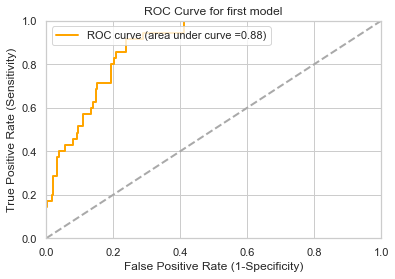

In [110]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'orange', lw = 2, label = 'ROC curve (area under curve =%0.2f)'%roc_auc)

plt.plot([0,1],[0,1], color = 'darkgrey',lw = 2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for first model')
plt.legend(loc = "upper left")
plt.show()

So the AUC is 0.88 which is considered good for a model

### Perform Hyperparameter Tuning

In [111]:
# Again creating a random forest classifier
clf_rf2 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', 
                                min_samples_split = 2, min_samples_leaf = 5, max_features = "auto",
                                random_state = 100, max_depth = 3) 

In [112]:
# Training the model 
clf_fit_2 = clf_rf2.fit(x_train, y_train) 

# Predicting the quality 
y_pred_2 = clf_fit_2.predict(x_test) 

In [113]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_2)

0.90625

We can see here that by changing the values of the parameter, there is a slight increase in the accuracy. Though the increase is not significant as the value only improved by 0.3, in the first model accuracy was 90.3 and now the accuracy is 90.6. Earlier we were using 'Entropy' as criterion, now we are using 'Gini' as criterion, the max depth of the tree has been decreased and so on. Similarly, we can keep on tuning the parameters, to obtain the highest accuracy

In [114]:
# Predicting the probabilities of wine being of high quality using the second model
y_proba_2 = clf_fit.predict_proba(x_test)

In [115]:
# Visualizing the ROC-AUC curve 

# We take the predicted values of class 1
y_predicted_2 = y_proba_2[:,1]

# Using roc_curve() to generate fpr & tpr values
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_2)

# Passing the fpr & tpr values to auc() to calculate the area under curve
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
print("Area under the curve for the second model",roc_auc)

Area under the curve for the second model 0.8842105263157894


There is no change in the AUC value of both the models